In [1]:
import numpy as np
import matplotlib.pyplot as pl
import ot

/tmp/ipykernel_19151/957329028.py:24: RuntimeWarning: covariance is not positive-semidefinite.
  xt = np.random.multivariate_normal(mu_t, cov_t, n_s)
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


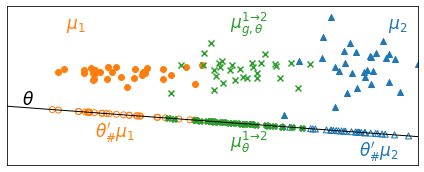

In [2]:
pl.rcParams["figure.figsize"] = (6,2.5)

pl.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif",
#    "font.sans-serif": ["Helvetica"],
    "pdf.fonttype": 42,
    "ps.fonttype":42, 
    "font.size": 10})

np.random.seed(seed=2023)
dim = 2
n_s = 30
mu_s = np.array([0,2])
cov_s = np.diag(np.ones(dim))*0.3
cov_s[0,0] = 1
cov_s[1,1] = 0.05
mu_t = np.array([8,2])
cov_t = np.array([[1, -0.6], [0.5,1]])

projections = np.array([1,-0.1]).reshape(-1,1)
projections = projections / np.sqrt(np.sum(projections**2, 0, keepdims=True))
xs = np.random.multivariate_normal(mu_s, cov_s, n_s)
xt = np.random.multivariate_normal(mu_t, cov_t, n_s)

#compute swgg
xs_line = np.dot(xs, projections)
xt_line = np.dot(xt, projections)
pos_xs = np.argsort(xs_line, axis = 0)
pos_xt = np.argsort(xt_line, axis = 0)
xt_proj = xt_line * projections.T
xs_proj = xs_line * projections.T
xs_sort = np.take_along_axis(xs, np.ones(xs.shape, dtype=int)*pos_xs, axis=0)
xt_sort = np.take_along_axis(xt, np.ones(xt.shape, dtype=int)*pos_xt, axis=0)
xt_proj = (np.sort(xt_line, axis=0) * projections.T)
xs_proj = (np.sort(xs_line, axis=0) * projections.T)
xp = (xs_proj + xt_proj)/2 
W_xs_proj_bary = np.sum((xp - xs_proj)**2)/n_s
W_xt_proj_bary = np.sum((xp - xt_proj)**2)/n_s
t=.5
z=(1 - t) * xs_sort + t * xt_sort

#draw the samples and the line
pl.axline((0,0), (1, -0.1), color='k', linewidth=1)
pl.scatter(xs[:,0], xs[:,1], marker = 'o', color='C1')
pl.scatter(xt[:,0], xt[:,1], marker='^',  color='C0')


#draw the projections 
pl.scatter(xs_proj[:,0], xs_proj[:,1], marker = 'o', color='C1',  facecolors='none')
pl.scatter(xt_proj[:,0], xt_proj[:,1], marker='^',  color='C0',   facecolors='none')

#draw the barycenter
pl.scatter(xp[:,0], xp[:,1], marker = 'X', color='C2')
pl.scatter(z[:,0], z[:,1], marker = 'x', color='C2')
pl.grid(False)
pl.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
pl.text(-3.5, 0.5, r"$\theta$", fontsize=17)
pl.text(-2,4,'$\mu_1$', fontsize=17, color='C1')
pl.text(9,4,'$\mu_2$', fontsize=17, color='C0')
pl.text(3.6,4,r'$\mu^{1 \to 2}_{g, \theta}$' , fontsize=17, color='C2')

pl.text(3.6,-1.5,r'$\mu^{1 \to 2}_{\theta}$' , fontsize=17, color='C2')
pl.text(-1,-1,r'$\theta^\prime_\# \mu_1$' , fontsize=17, color='C1')
pl.text(8,-1.9,r'$\theta^\prime_\# \mu_2$' , fontsize=17, color='C0')
pl.text
pl.ylim(-2.3,5)
pl.xlim(-4,10)
pl.tight_layout()
pl.savefig("fig1_left.pdf")
pl.show()

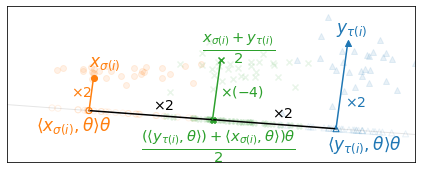

In [3]:
#draw the samples and the line
pl.axline((0,0), (1,-0.1), color='k', linewidth=1, alpha=0.1)
pl.scatter(xs[:,0], xs[:,1], marker = 'o', color='C1', alpha=0.1)
pl.scatter(xt[:,0], xt[:,1], marker='^',  color='C0', alpha=0.1)

idx = 10
pl.scatter(xs_sort[idx,0], xs_sort[idx,1], marker = 'o', color='C1')
pl.scatter(xt_sort[idx,0], xt_sort[idx,1], marker='^',  color='C0')


#draw the projections 

pl.scatter(xs_proj[:,0], xs_proj[:,1], marker = 'o', color='C1',  facecolors='none', alpha=0.1)
pl.scatter(xt_proj[:,0], xt_proj[:,1], marker='^',  color='C0',   facecolors='none', alpha=0.1)
pl.scatter(xs_proj[idx,0], xs_proj[idx,1], marker = 'o', color='C1',  facecolors='none')
pl.scatter(xt_proj[idx,0], xt_proj[idx,1], marker='^',  color='C0',   facecolors='none')

#draw the barycenter
pl.scatter(xp[:,0], xp[:,1], marker = 'X', color='C2', alpha=0.1)
pl.scatter(z[:,0], z[:,1], marker = 'x', color='C2', alpha=0.1)

pl.plot([xs_proj[idx,0], xp[idx,0]], [xs_proj[idx,1], xp[idx,1]], color="k")
pl.plot([xt_proj[idx,0], xp[idx,0]], [xt_proj[idx,1], xp[idx,1]], color="k")

pl.scatter(xp[idx,0], xp[idx,1], marker = 'X', color='C2')
pl.scatter(z[idx,0], z[idx,1], marker = 'x', color='C2')


pl.plot([xs_sort[idx,0], xs_proj[idx,0]], [xs_sort[idx,1], xs_proj[idx,1]], color="C1")
pl.plot([xt_sort[idx,0], xt_proj[idx,0]], [xt_sort[idx,1], xt_proj[idx,1]], color="C0")
pl.plot([xp[idx,0], z[idx,0]], [xp[idx,1], z[idx,1]], color="C2")

pl.grid(False)
pl.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
pl.text(-1.2,2.2,r'$x_{\sigma(i)}$' , fontsize=17, color='C1')
pl.text(-1.8,0.8,r'$\times 2$' , fontsize=14, color='C1')
pl.text(7.3,3.8,r'$y_{\tau(i)}$' , fontsize=17, color='C0')
pl.text(7.6,0.3,r'$\times 2$' , fontsize=14, color='C0')
pl.text(2.7,2.7,r'$\frac{x_{\sigma(i)}+y_{\tau(i)}}{2}$' , fontsize=21, color='C2')
pl.text(3.3,0.8,r'$\times (-4)$' , fontsize=14, color='C2')

pl.text(-3,-0.8,r'$\langle x_{\sigma(i)},\theta \rangle\theta$' , fontsize=17, color='C1')
pl.text(7,-1.7,r'$\langle y_{\tau(i)},\theta \rangle\theta$' , fontsize=17, color='C0')
pl.text(0.6,-1.9,r'$\frac{(\langle y_{\tau(i)},\theta \rangle)+\langle x_{\sigma(i)},\theta\rangle)\theta}{2}$' , fontsize=21, color='C2')

pl.text(1,0.2,r'$\times 2$' , fontsize=14, color='k')
pl.text(5.1,-0.2,r'$\times 2$' , fontsize=14, color='k')

pl.ylim(-2.3,5)
pl.xlim(-4,10)
pl.tight_layout()
pl.savefig("fig1_right.pdf")
pl.show()

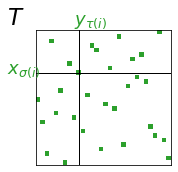

In [5]:
import matplotlib as mpl

colors = [ 'white', 'C2']
bounds = [-0.5,0.5]

cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

pl.rcParams["figure.figsize"] = (6,2.5)
pi = np.zeros((n_s,n_s))
pi[pos_xs, pos_xt] = 1
pl.imshow(pi, interpolation='none', cmap=cmap, norm=norm)
pl.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
pl.text(-7,idx-1,r'$x_{\sigma(i)}$' , fontsize=18, color='C2')
pl.text(idx-2,-1.8,r'$y_{\tau(i)}$' , fontsize=18, color='C2')
pl.text(-7, -1.8,r'$T$' , fontsize=23, color='k')
pl.axline((0,idx-1), (idx-1,idx-1), color='k', linewidth=1)
pl.axline((idx-1,0), (idx-1,idx-1), color='k', linewidth=1)
pl.tight_layout()
pl.savefig("fig1_plan.pdf",bbox_inches='tight')
pl.show()